## OCNS 2019, Simulating dendrites at different levels of abstraction.
## Exercise 3: Coincidence detection in the apical tree through calcium spike.
### In this exercise we will see how coincident inputs at the dendrite and soma produce a supralinear response.
#### This exercise is based on Schaefer et al. 2003 (https://www.physiology.org/doi/full/10.1152/jn.00046.2003), with code modified from ModelDB (https://senselab.med.yale.edu/modeldb/showmodel.cshtml?model=83344&file=%2FBACFiring%2FBACModel.hoc#tabs-1)

In [19]:
%%bash
nrnivmodl # Compile NEURON model

/Users/wfpodlaski/Dropbox/Code/ocns2019_simulatingdendrites/BAC_model_ocns2019
SlowCa.mod cad2.mod child.mod childa.mod epsp.mod it2.mod kaprox.mod kca.mod km.mod kv.mod na.mod
SlowCa.mod cad2.mod child.mod childa.mod epsp.mod it2.mod kaprox.mod kca.mod km.mod kv.mod na.mod
"/Applications/NEURON-7.7/nrn/share/nrn/libtool" --tag=CC --mode=compile gcc -DHAVE_CONFIG_H  -I. -I.. -I"/Applications/NEURON-7.7/nrn/include/nrn" -I"/Applications/NEURON-7.7/nrn/x86_64/lib"      -g -O2 -c -o mod_func.lo mod_func.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -I.. -I/Applications/NEURON-7.7/nrn/include/nrn -I/Applications/NEURON-7.7/nrn/x86_64/lib -g -O2 -c mod_func.c  -fno-common -DPIC -o .libs/mod_func.o
"/Applications/NEURON-7.7/nrn/share/nrn/libtool" --tag=CC --mode=link gcc -module  -g -O2    -headerpad_max_install_names -o libnrnmech.la -rpath "/Applications/NEURON-7.7/nrn/x86_64/lib"  SlowCa.lo cad2.lo child.lo childa.lo epsp.lo it2.lo kaprox.lo kca.lo km.lo kv.lo na.lo mod_func.lo  -L"/Applic

In [1]:
from neuron import h, gui
import matplotlib.pyplot as plt
% matplotlib inline

h.tstop=1100
h.steps_per_ms = 40
h.dt = 0.025

In [2]:
h.xopen("morphology.nrn")
h.xopen("Model_specification.hoc")

	1 


1.0

In [3]:
for sec in h.allsec() :
    if(h.nseg < h.L/20) : 
            h.nseg=int(h.L/20+1 )

h.create_axon() 
h.init_cell()

0.0

In [4]:
#Create a current Clamp procedure called "IatSoma" starting at 1005.1 ms and with duration=5ms. Amplitude is an argument.     
ic=h.IClamp(h.somaA(0.5))
ic.delay=1005.1   #ms
ic.dur=5   #ms
ic.amp=1.8  #nA

In [5]:
#Include an EPSP
# EPSP : f(t) = (1-exp(-t/chi1)) * exp(-t/chi2) 
#       mit chi1 = 0.5 -2 ms und chi2 = 2-8 ms
syn =h.epsp(h.mbSec.sec(0))
   
syn.tau0 = 0.8   
syn.tau1 = 4     
syn.onset = 1007.1  
syn.imax = 0.6

In [6]:
vsoma_vec = h.Vector()        # Membrane potential vector
vdend1_vec = h.Vector()        # Membrane potential vector
t_vec = h.Vector()        # Time stamp vector
vsoma_vec.record(h.somaA(0.5)._ref_v)
vdend1_vec.record(h.mbSec.sec(0.5)._ref_v)
t_vec.record(h._ref_t)

Vector[5]

In [7]:
sh1 = h.PlotShape(0)
sh1.size(-386.7,313.3,-150.382,1048.64)
sh1.variable("v")
{sh1.view(-386.7, -150.382, 700, 1199.02, 331, 30, 325, 570)}
h.fast_flush_list.append(sh1)
sh1.save_name("fast_flush_list.")
sh1.show(1)
sh1.exec_menu("Shape Plot")

sh2= h.PlotShape(0)
sh2.size(-792.112,571.207,-154.611,1031.33)
sh2.variable("cai")
{sh2.view(-792.112, -154.611, 1363.32, 1185.94, 5, 340, 300, 260)}
h.fast_flush_list.append(sh2)
sh2.save_name("fast_flush_list.")
sh2.show(1)
sh2.exec_menu("Shape Plot")
sh2.scale(0,3)


1.0

Text(0,0.5,'mV')

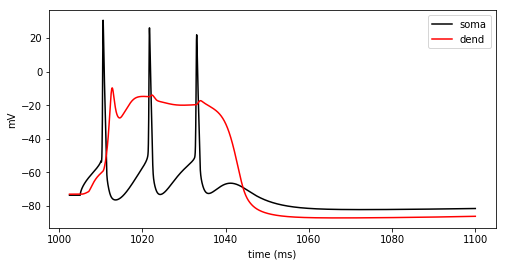

In [8]:
h.init()
h.run()

vsoma_vec.remove(0,200)
vdend1_vec.remove(0,200)
t_vec.remove(0,200)
plt.figure(figsize=(8,4)) # Default figsize is (8,6)
soma_plot = plt.plot(t_vec, vsoma_vec, color='black')
dend_plot = plt.plot(t_vec, vdend1_vec, color='red')
plt.legend(soma_plot + dend_plot, ['soma', 'dend'])
plt.xlabel('time (ms)')
plt.ylabel('mV')